In [38]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telecom-churn-datasets/churn-bigml-20.csv
/kaggle/input/telecom-churn-datasets/churn-bigml-80.csv


# 📌 1. Business Understanding  

## 🎯 Customer Churn Prediction and Retention Strategies  

### 🔄 What is Customer Churn?  
Customer **churn** refers to the loss of customers within a given timeframe.  

---

### 💸 Why is Churn Costly for Businesses?  
- Acquiring **new customers** is almost **5× more expensive** than retaining existing ones.  
- High churn rates directly reduce profitability and growth potential.  

---

### ⚠️ Challenges in the Telecom Industry  
- 📊 **High competition** and saturated markets  
- 💰 **Price sensitivity** among customers  
- 😟 **Dissatisfaction** with service quality, pricing, or offers  

---

### ✅ Importance of Reducing Churn  
- 💵 **Improve profitability**: Retaining customers reduces acquisition costs.  
- 🤝 **Enhance loyalty**: Focus on retention builds stronger, long-term customer relationships.  
- 🎯 **Optimize marketing**: Enables better targeting of promotions and offers to loyal customers.  



In [39]:
#Load dataset
data_80 = pd.read_csv('/kaggle/input/telecom-churn-datasets/churn-bigml-20.csv')
data_20 = pd.read_csv('/kaggle/input/telecom-churn-datasets/churn-bigml-20.csv')

# Concatenate datasets by rows
df = pd.concat([data_80, data_20], axis=0, ignore_index=True)

**Check the First 5 rows**

In [40]:
df.head()

State  Account length  Area code International plan Voice mail plan  \
0    LA             117        408                 No              No   
1    IN              65        415                 No              No   
2    NY             161        415                 No              No   
3    SC             111        415                 No              No   
4    HI              49        510                 No              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                      0              184.5               97   
1                      0              129.1              137   
2                      0              332.9               67   
3                      0              110.4              103   
4                      0              119.3              117   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             31.37              351.6               80             29.89   
1             21.95              228.5               83             19.42   
2             56.59              317.8               97             27.01   
3             18.77              137.3              102             11.67   
4             20.28              215.1              109             18.28   

   Total night minutes  Total night calls  Total night charge  \
0                215.8                 90                9.71   
1                208.8                111                9.40   
2                160.6                128                7.23   
3                189.6                105                8.53   
4                178.7                 90                8.04   

   Total intl minutes  Total intl calls  Total intl charge  \
0                 8.7                 4               2.35   
1                12.7                 6               3.43   
2                 5.4                 9               1.46   
3                 7.7                 6               2.08   
4                11.1                 1               3.00   

   Customer service calls  Churn  
0                       1  False  
1                       4   True  
2                       4   True  
3                       2  False  
4                       1  False

**Check the type of the columns and the null values**

In [41]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1334 entries, 0 to 1333
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   1334 non-null   object 
 1   Account length          1334 non-null   int64  
 2   Area code               1334 non-null   int64  
 3   International plan      1334 non-null   object 
 4   Voice mail plan         1334 non-null   object 
 5   Number vmail messages   1334 non-null   int64  
 6   Total day minutes       1334 non-null   float64
 7   Total day calls         1334 non-null   int64  
 8   Total day charge        1334 non-null   float64
 9   Total eve minutes       1334 non-null   float64
 10  Total eve calls         1334 non-null   int64  
 11  Total eve charge        1334 non-null   float64
 12  Total night minutes     1334 non-null   float64
 13  Total night calls       1334 non-null   int64  
 14  Total night charge      1334 non-null   

In [42]:
df["Churn"].value_counts()

Churn
False    1144
True      190
Name: count, dtype: int64

**Shape of the data**

In [43]:
df.shape

(1334, 20)

**Check missing values**

In [44]:
df.isna().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

**Statistical** analysis**

In [45]:
df.describe()

Account length    Area code  Number vmail messages  Total day minutes  \
count     1334.000000  1334.000000            1334.000000        1334.000000   
mean       102.841079   436.157421               8.407796         180.948126   
std         40.804166    41.767629              13.989230          55.487803   
min          1.000000   408.000000               0.000000          25.900000   
25%         76.000000   408.000000               0.000000         146.225000   
50%        102.000000   415.000000               0.000000         178.300000   
75%        128.000000   415.000000              20.000000         220.700000   
max        232.000000   510.000000              51.000000         334.300000   

       Total day calls  Total day charge  Total eve minutes  Total eve calls  \
count      1334.000000       1334.000000        1334.000000      1334.000000   
mean        100.937031         30.761769         203.355322       100.476762   
std          20.389138          9.432923          49.700616        18.941153   
min          30.000000          4.400000          48.100000        37.000000   
25%          87.250000         24.855000         170.825000        88.000000   
50%         101.000000         30.310000         203.700000       101.000000   
75%         115.000000         37.520000         236.475000       113.000000   
max         165.000000         56.830000         361.800000       168.000000   

       Total eve charge  Total night minutes  Total night calls  \
count       1334.000000          1334.000000        1334.000000   
mean          17.285262           199.685307         100.113943   
std            4.224575            49.741263          20.164937   
min            4.090000            23.200000          42.000000   
25%           14.520000           167.825000          86.000000   
50%           17.310000           201.600000         100.000000   
75%           20.097500           231.500000         113.750000   
max           30.750000           367.700000         175.000000   

       Total night charge  Total intl minutes  Total intl calls  \
count         1334.000000         1334.000000       1334.000000   
mean             8.985907           10.238381          4.527736   
std              2.238589            2.806796          2.481511   
min              1.040000            0.000000          0.000000   
25%              7.555000            8.600000          3.000000   
50%              9.070000           10.500000          4.000000   
75%             10.420000           12.075000          6.000000   
max             16.550000           18.300000         18.000000   

       Total intl charge  Customer service calls  
count        1334.000000             1334.000000  
mean            2.764948                1.563718  
std             0.757882                1.332857  
min             0.000000                0.000000  
25%             2.320000                1.000000  
50%             2.840000                1.000000  
75%             3.262500                2.000000  
max             4.940000                8.000000

****Check** duplicates**

In [46]:
sum(df.duplicated())

667

**Check number of unique values**

In [47]:
unique_counts = df.nunique()

print(unique_counts)

State                      51
Account length            179
Area code                   3
International plan          2
Voice mail plan             2
Number vmail messages      37
Total day minutes         562
Total day calls           100
Total day charge          562
Total eve minutes         557
Total eve calls            94
Total eve charge          528
Total night minutes       568
Total night calls          96
Total night charge        453
Total intl minutes        132
Total intl calls           17
Total intl charge         132
Customer service calls      9
Churn                       2
dtype: int64


In [48]:
x=df.drop(columns="Churn")
y=df["Churn"]

In [49]:
y

0       False
1        True
2        True
3       False
4       False
        ...  
1329    False
1330    False
1331    False
1332    False
1333    False
Name: Churn, Length: 1334, dtype: bool

Seperate categorical columns and numerical columns

In [50]:
numerical_cols = []
for col in df.columns:
    if df[col].dtype in ["int64" , "float64"] and col != "Churn":
        numerical_cols.append(col)

In [51]:
numerical_cols

['Account length',
 'Area code',
 'Number vmail messages',
 'Total day minutes',
 'Total day calls',
 'Total day charge',
 'Total eve minutes',
 'Total eve calls',
 'Total eve charge',
 'Total night minutes',
 'Total night calls',
 'Total night charge',
 'Total intl minutes',
 'Total intl calls',
 'Total intl charge',
 'Customer service calls']

In [52]:
categorical_cols = []
for col in df.columns:
    if df[col].dtype in ("object","bool"):
        categorical_cols.append(col)

In [53]:
categorical_cols

['State', 'International plan', 'Voice mail plan', 'Churn']

**EDA**

**Univariate analysis**

**Plotting categorical columns**

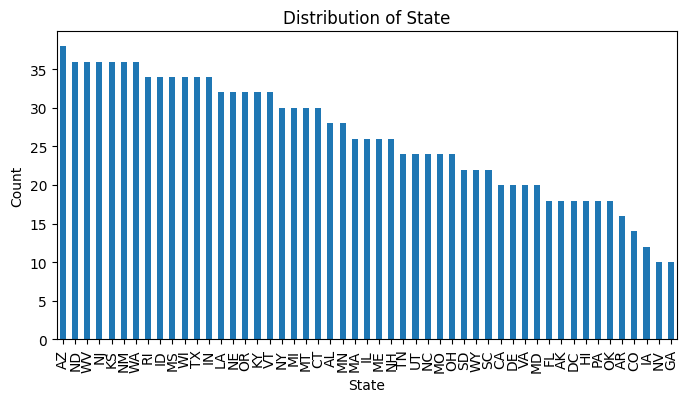

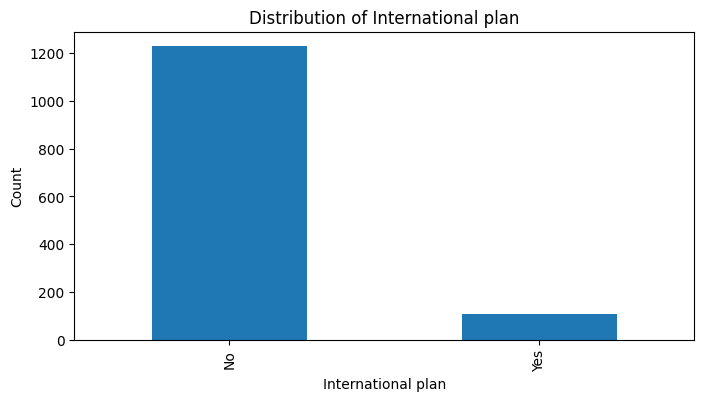

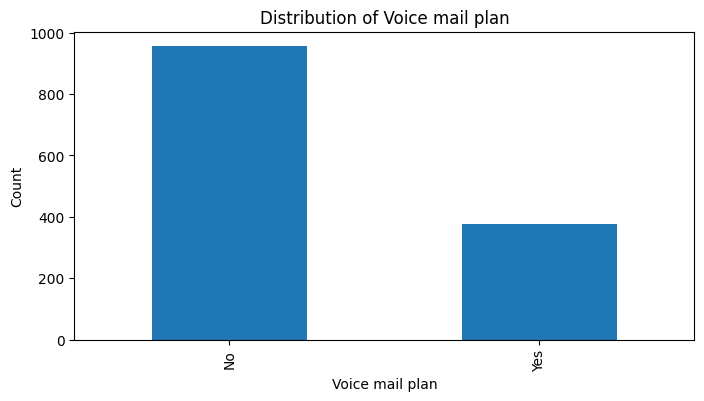

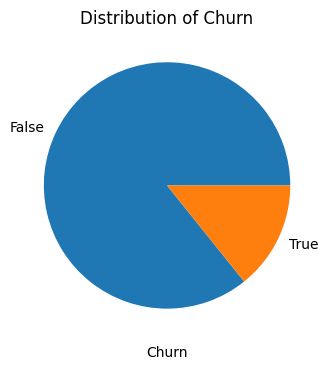

In [54]:
import matplotlib.pyplot as plt
for col in categorical_cols:
    plt.figure(figsize=(8,4))
    df[col].value_counts().plot(kind='bar' if col!='Churn' else 'pie')
    plt.title(f'Distribution of {col}')
    plt.ylabel('Count' if col != 'Churn' else '')
    plt.xlabel(col)
    plt.show() 

**Plotting numerical columns**

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



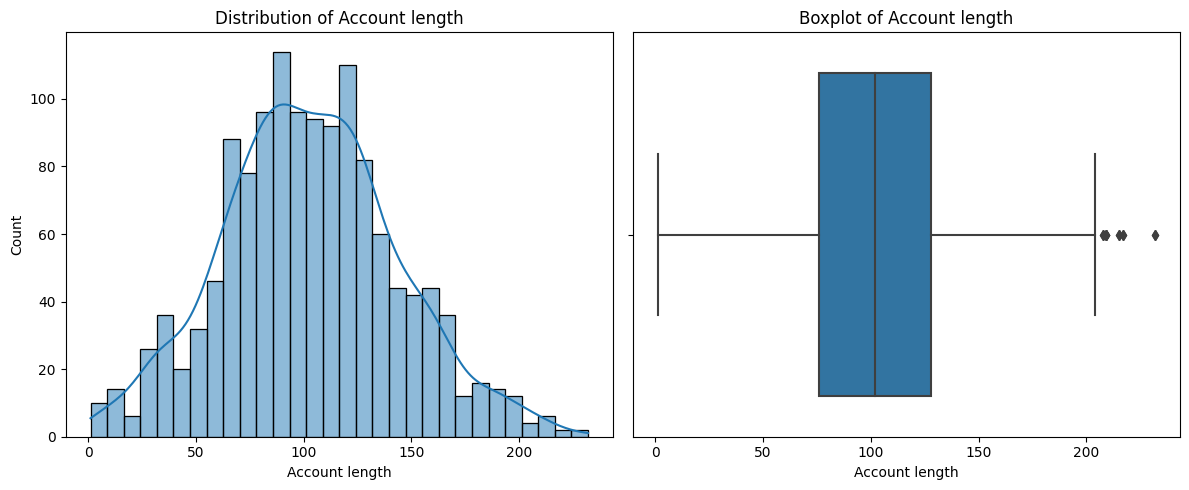

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



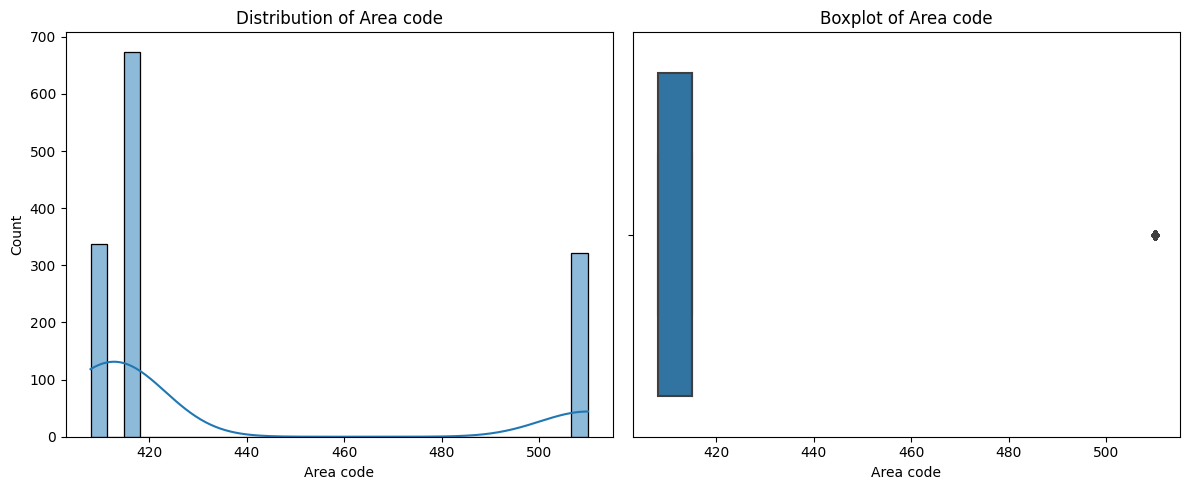

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



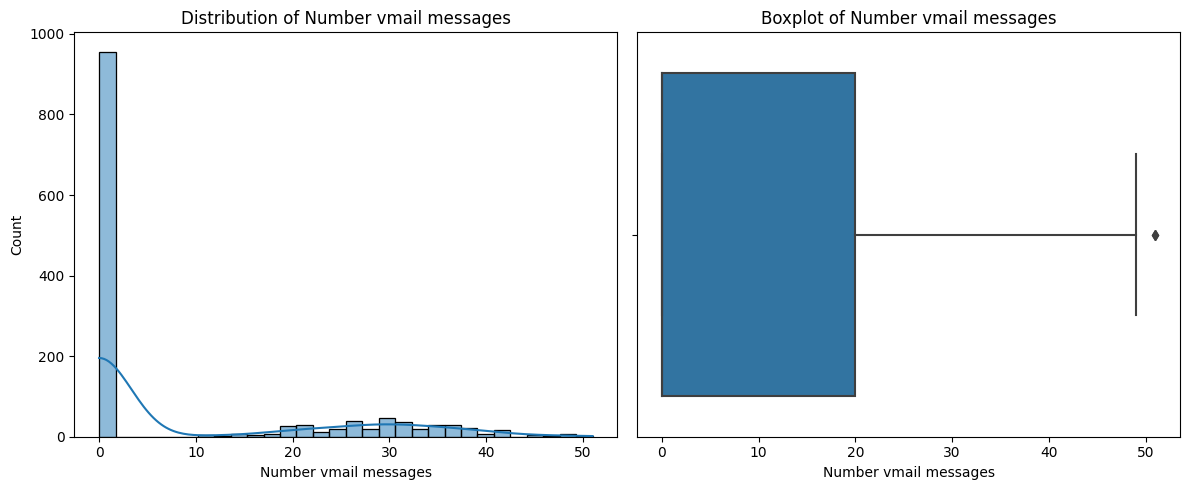

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



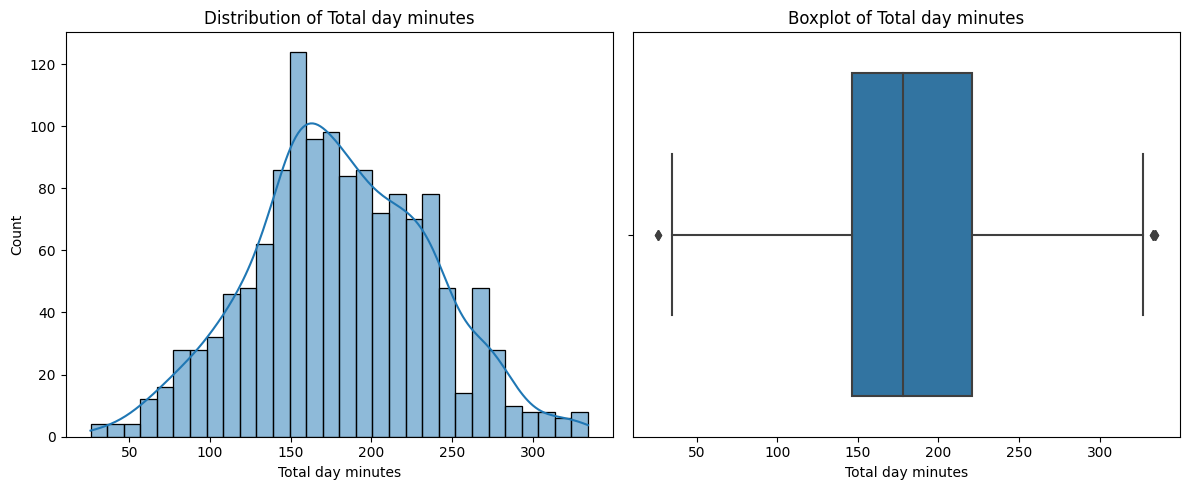

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



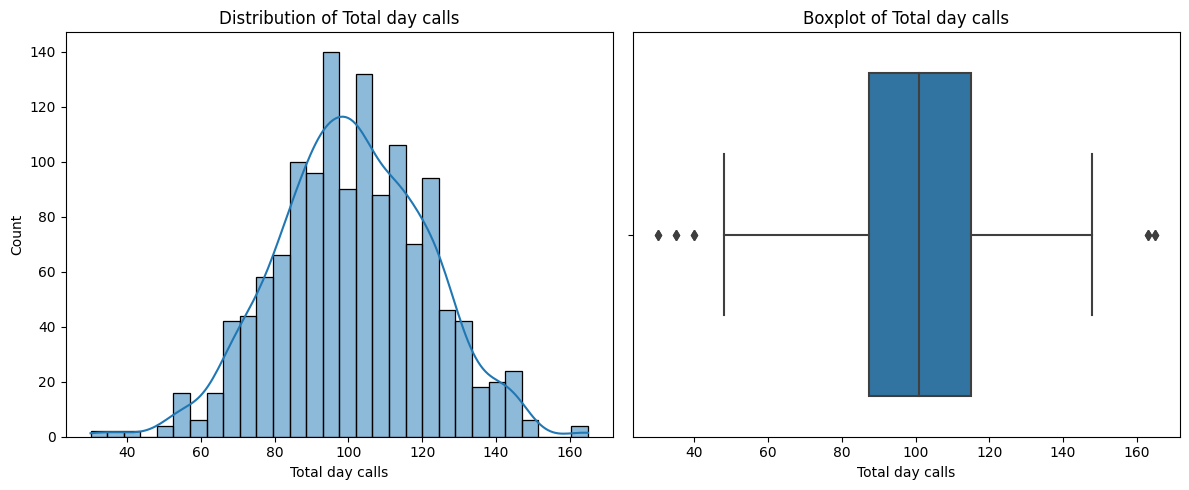

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



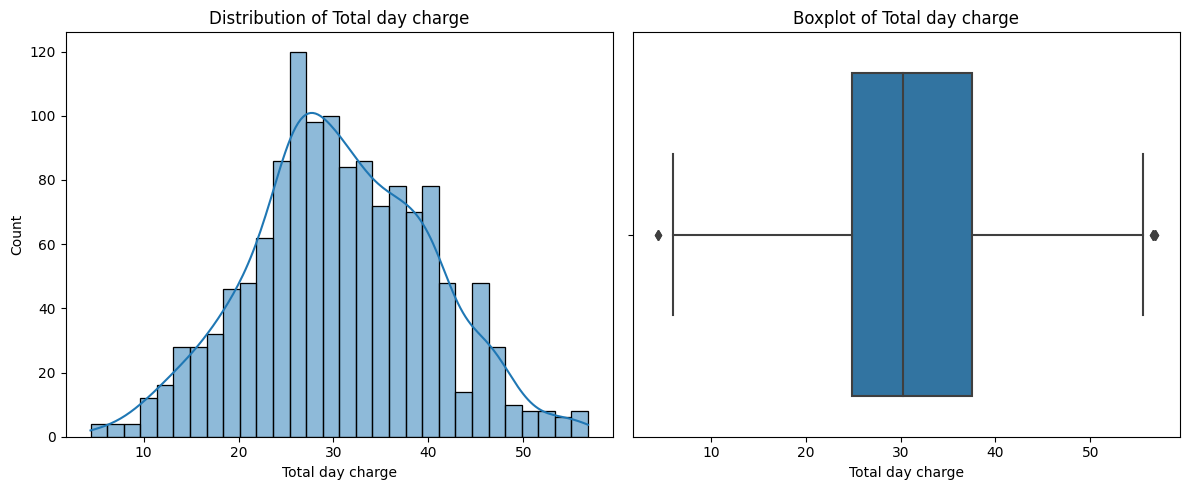

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



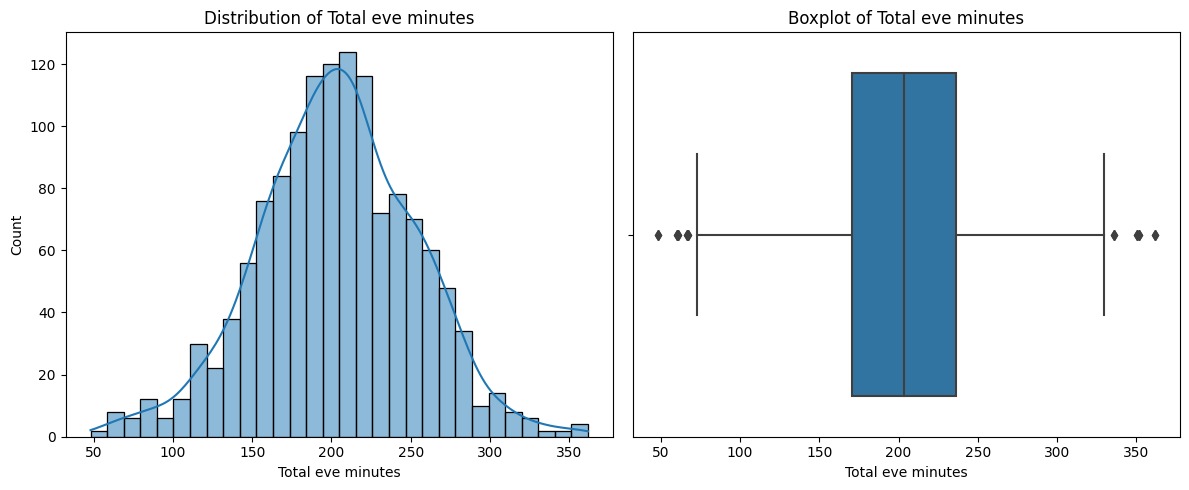

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



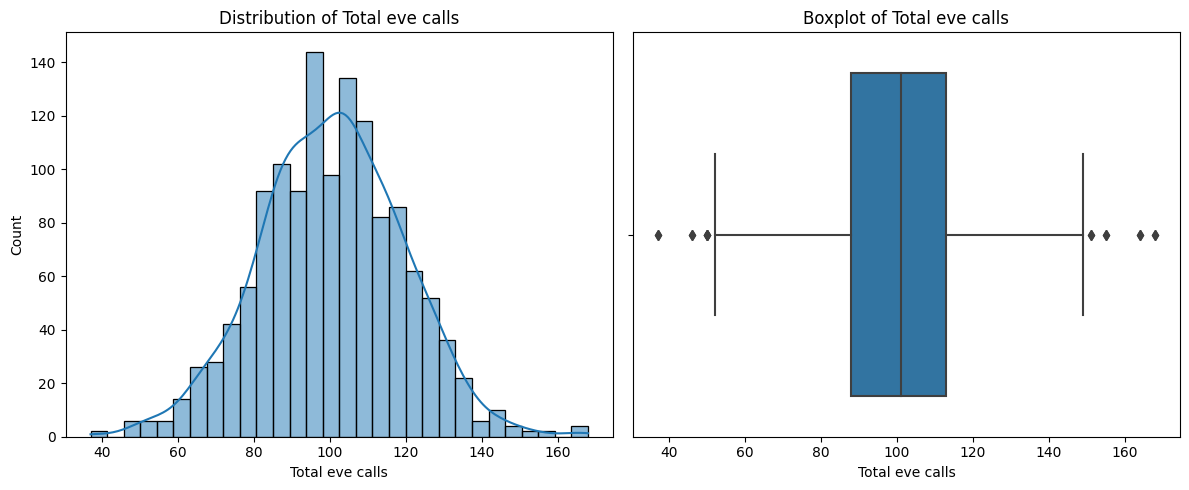

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



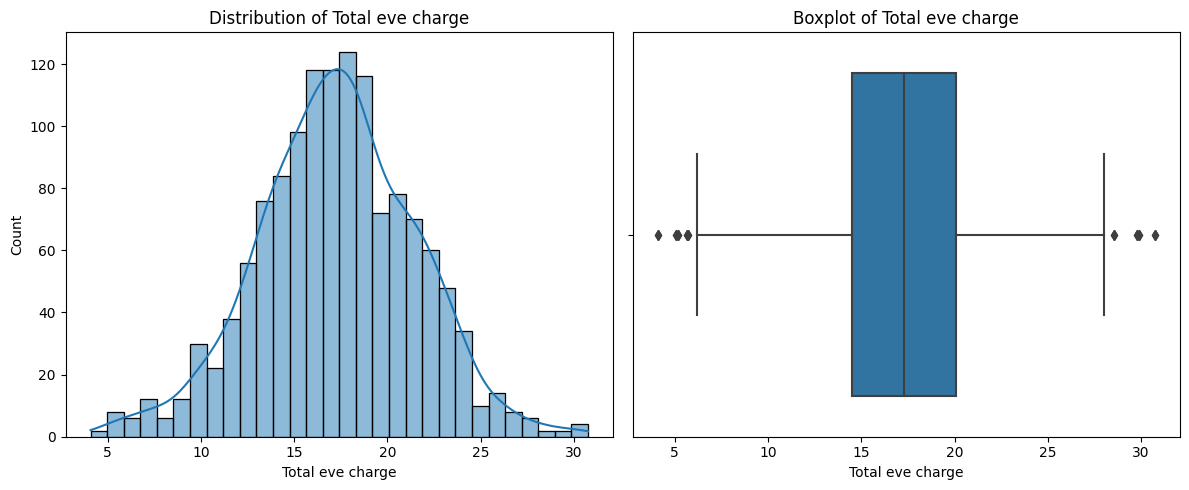

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



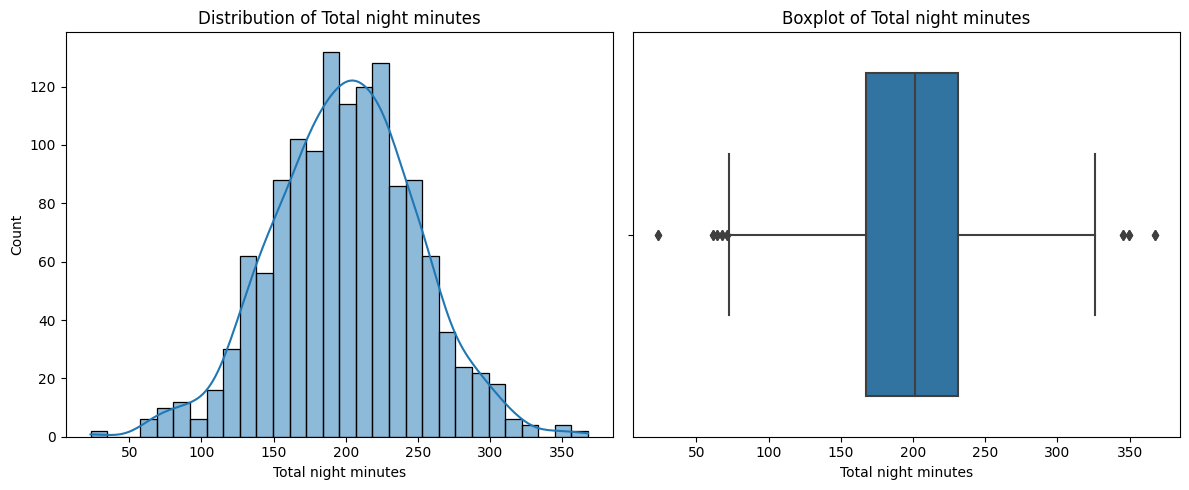

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



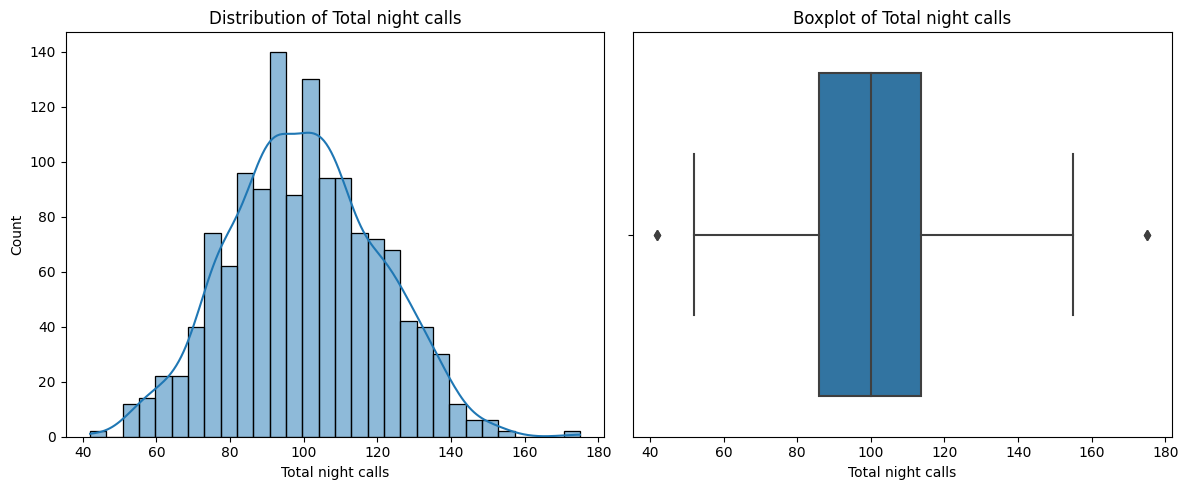

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



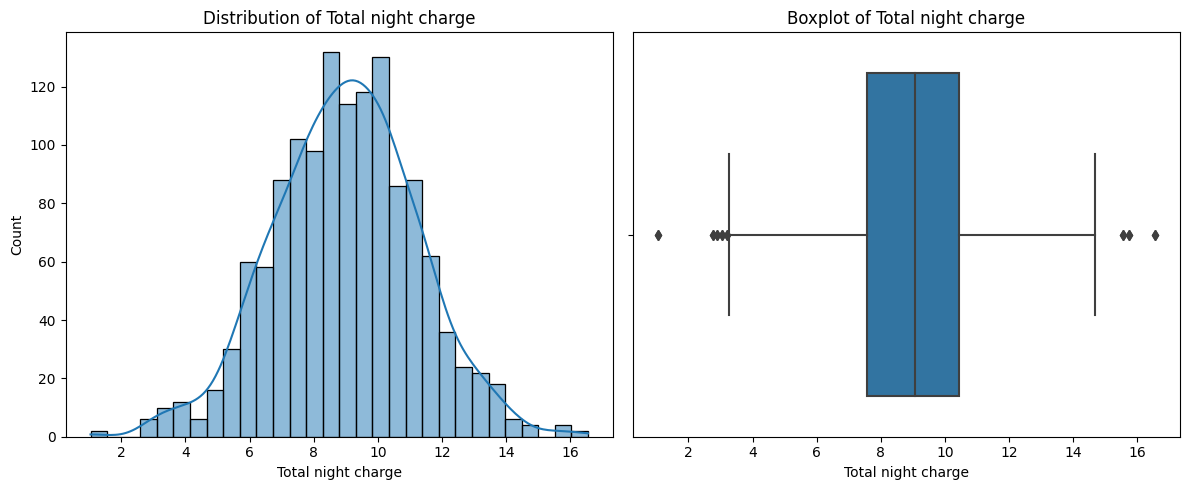

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



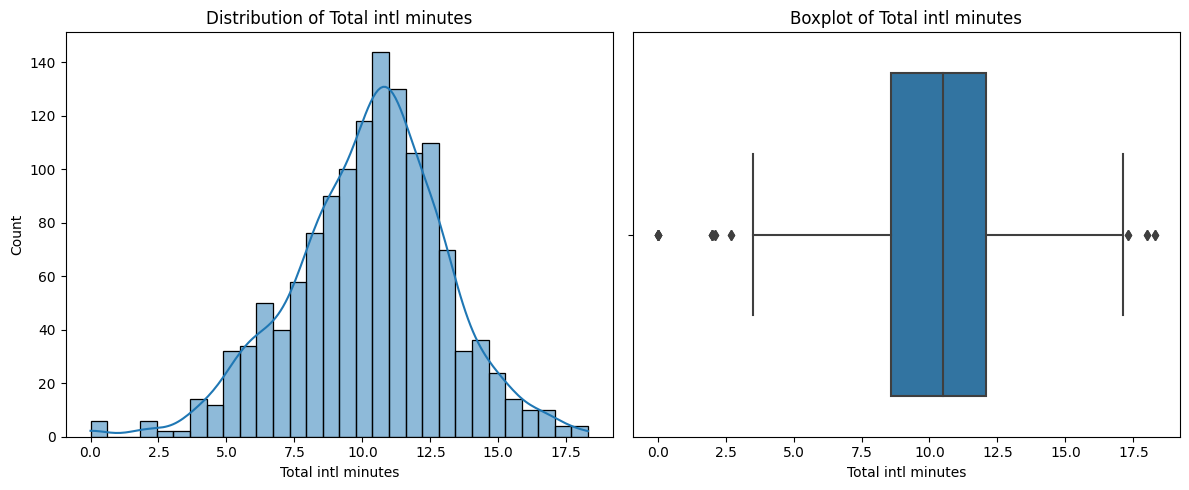

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



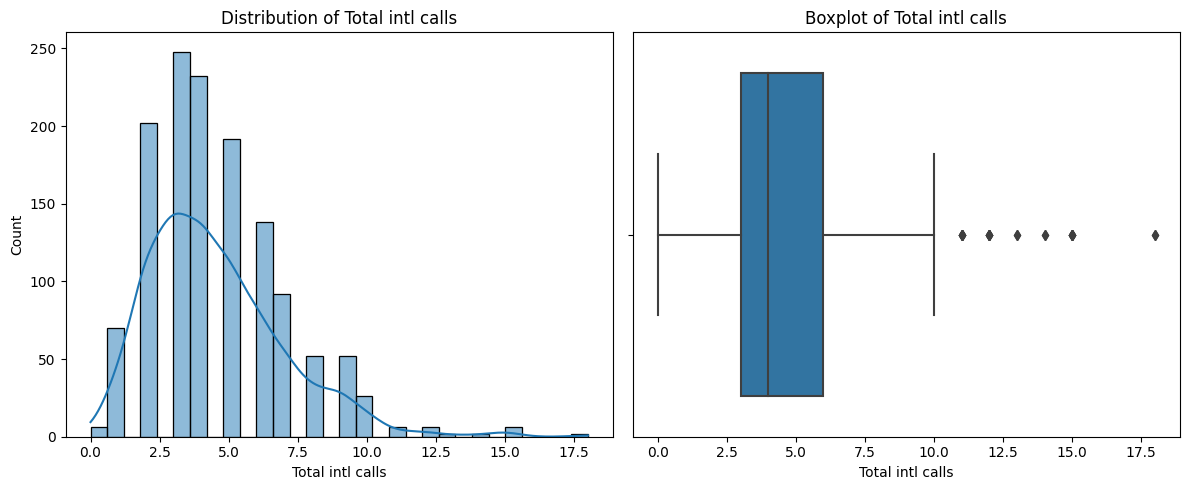

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



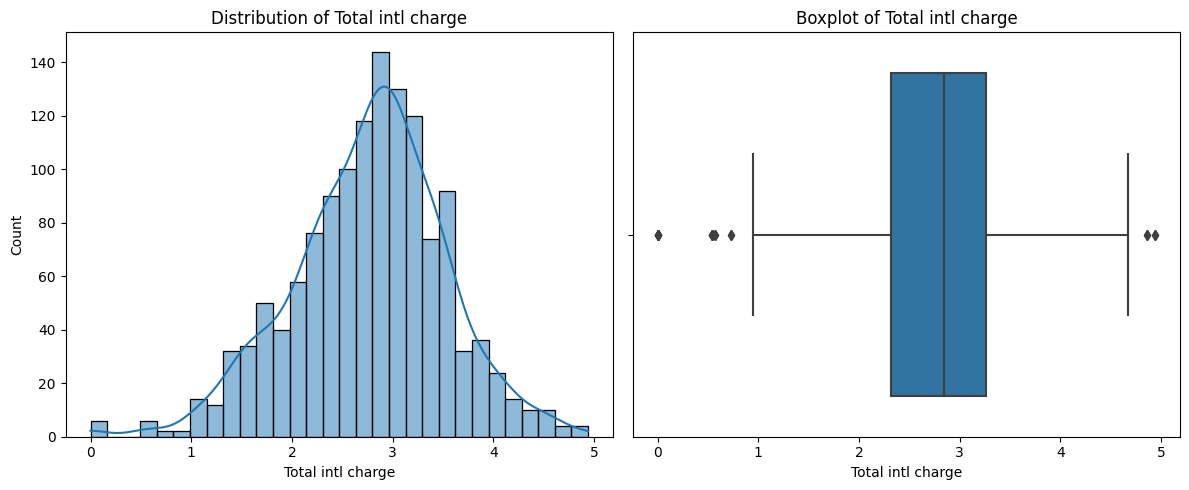

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



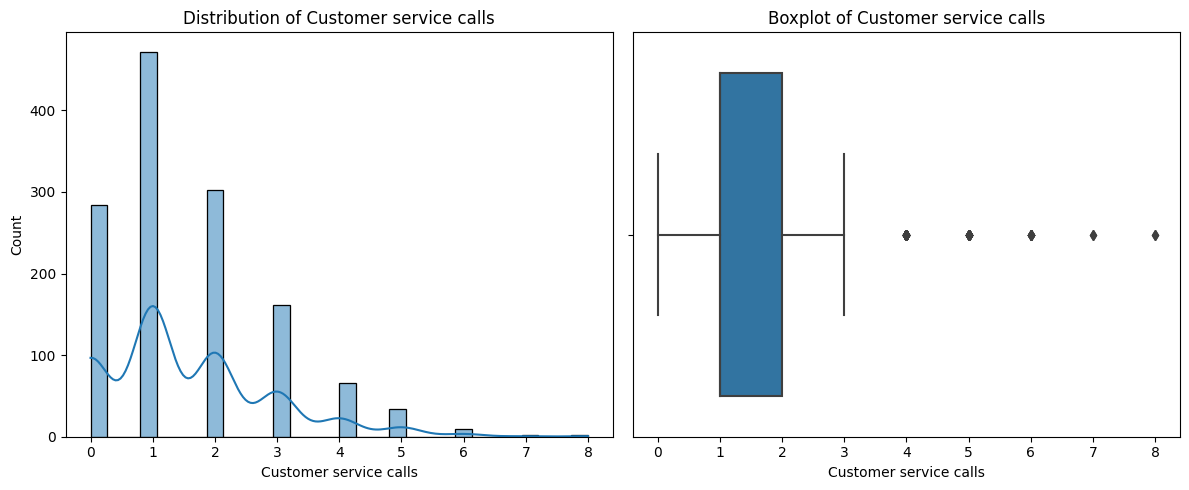

In [55]:
import seaborn as sns
for col in numerical_cols:
    plt.figure(figsize=(12,5))
    
    plt.subplot(1,2,1)
    sns.histplot(df[col],kde=True,bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show() 
    

**INSIGHTS : MOST OF THE DISTRUBIUTIONS ARE NORMAL + THERE IS A LOT OF OULIERS**

**Bivariate analysis**

In [56]:
import plotly.express as px

total_charges= (
     df['Total day charge'] +
    df['Total eve charge'] +
    df['Total night charge'] +
    df['Total intl charge']
)  
eda_df = pd.DataFrame({
    'Total Charges': total_charges,
    'Churn': df['Churn']
})
fig= px.scatter(
    eda_df,
    x='Total Charges',
    y=eda_df.index,
    color='Churn',
    color_discrete_map={0: 'blue', 1: 'red'},  # Non-churn: blue, Churn: red
    labels={'y': 'Customer Index'},
    title='Scatter Plot of Total Charges with Churn Status'

)
fig.update_layout(
    xaxis_title="Total Charges",
    yaxis_title="Customer Index",
    legend_title="Churn Status",
    # template="plotly_white"
)

# Show the plot
fig.show() 


**THE MOST THE CUSTOMER CHARGES THE MORE they are LIKLY TO CHURN**

In [57]:
state_churn_data = df.groupby(['State', 'Churn']).size().unstack(fill_value=0).reset_index()
state_churn_data.columns = ['State', 'Non_Churn', 'Churn']

# Prepare the map data
state_churn_data['Total'] = state_churn_data['Churn'] + state_churn_data['Non_Churn']

# Plot a choropleth map
fig = px.choropleth(
    state_churn_data,
    locations='State',
    locationmode='USA-states',
    color='Churn',  # Color based on churn count
    hover_data=['State', 'Churn', 'Non_Churn', 'Total'],
    scope='usa',
    color_continuous_scale='Reds',
    title="Churn and Non-Churn Counts Per State"
)

# Show the map
fig.show()

**TEXAS HAS THE MOST CHURN CUSTOMERS**

In [58]:
state_calls_data = df.groupby('State')['Customer service calls'].sum().reset_index()

# Plot a choropleth map
fig = px.choropleth(
    state_calls_data,
    locations='State',
    locationmode='USA-states',
    color='Customer service calls',  # Color based on total calls
    hover_data=['State', 'Customer service calls'],
    scope='usa',
    color_continuous_scale='Blues',
    title="Customer Service Calls Per State"
)

# Show the map
fig.show()

**CALIFORNIA ARE NOT USING CUSTOMER SURVICES THATS CAN BE RELATED TO THE HIGH CHURNING**

In [59]:
fig_day_minutes = px.box(data_frame=df, x='Churn', y='Total day minutes', title="Total Day Minutes vs Churn")
fig_day_minutes.show()

# Churn vs Total eve minutes
fig_eve_minutes = px.box(data_frame=df, x='Churn', y='Total eve minutes', title="Total Evening Minutes vs Churn")
fig_eve_minutes.show()

# Churn vs International plan
fig_international_plan = px.histogram(data_frame=df, x='International plan', color='Churn', barmode='group', title="International Plan vs Churn")
fig_international_plan.show()

# Churn vs Customer service calls
fig_service_calls = px.box(data_frame=df, x='Churn', y='Customer service calls', title="Customer Service Calls vs Churn")
fig_service_calls.show()

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
y=y.astype(int)

In [62]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder

X_train, X_val, y_train, y_val= train_test_split(
    x,y,test_size=0.2, random_state=42, stratify=y 
) 

for col in X_train.select_dtypes(include=["object"]).columns:
    le=LabelEncoder() 
    X_train[col] = le.fit_transform(X_train[col])
    X_val[col] = le.transform(X_val[col])  

## ⚡ Model Training - XGBoost
We train an **XGBoost** classifier, a powerful gradient boosting algorithm.  
After initial training, we use **GridSearchCV**, an automated hyperparameter optimization framework,  
to fine-tune key parameters (e.g., learning rate, max depth, n_estimators) and improve accuracy.


In [63]:
from xgboost import XGBClassifier

params = {
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "learning_rate": 0.05,      # sklearn API name
    "max_depth": 6,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "min_child_weight": 1,
    "verbosity": 1,
    "seed": 42,
    "n_estimators": 5000,       # large number so early stopping kicks in
    "use_label_encoder": False
}

bst = XGBClassifier(**params)

bst.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    early_stopping_rounds=50,
    verbose=50
)

print("Best iteration:", bst.best_iteration)
print("Best score:", bst.best_score)


[0]	validation_0-auc:0.86750
[50]	validation_0-auc:0.98862
[100]	validation_0-auc:0.99931
[150]	validation_0-auc:1.00000


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[158]	validation_0-auc:1.00000
Best iteration: 109
Best score: 1.0


In [64]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define the model
xgb = XGBClassifier(
    objective="binary:logistic",
    eval_metric="auc",
    use_label_encoder=False,
    n_estimators=1000, # A reasonably large number for a starting point
    early_stopping_rounds=50,
    seed=42
)

# Define the parameter grid to search
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='roc_auc',  # Or another appropriate metric
    cv=3,               # Number of cross-validation folds
    verbose=1,
    n_jobs=-1           # Use all available CPU cores
    )

# Fit the grid search to the training data
grid_search.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)]
)

# Print the best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best AUC score found: ", grid_search.best_score_)

# The best model is now available at grid_search.best_estimator_
best_model = grid_search.best_estimator_ 

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[0]	validation_0-auc:0.78367
[1]	validation_0-auc:0.77522
[2]	validation_0-auc:0.78108
[0]	validation_0-auc:0.71282
[3]	validation_0-auc:0.80016
[1]	validation_0-auc:0.82234
[4]	validation_0-auc:0.79982
[2]	validation_0-auc:0.86382
[3]	validation_0-auc:0.86928
[5]	validation_0-auc:0.79959
[4]	validation_0-auc:0.87135
[6]	validation_0-auc:0.81809
[5]	validation_0-auc:0.87308
[7]	validation_0-auc:0.87388
[6]	validation_0-auc:0.87503
[8]	validation_0-auc:0.87348
[7]	validation_0-auc:0.87899
[9]	validation_0-auc:0.87526
[8]	validation_0-auc:0.87796
[0]	validation_0-auc:0.83389
[9]	validation_0-auc:0.87715
[10]	validation_0-auc:0.86595
[0]	validation_0-auc:0.78505
[1]	validation_0-auc:0.84032
[10]	validation_0-auc:0.87796
[11]	validation_0-auc:0.86480
[1]	validation_0-auc:0.78287
[11]	validation_0-auc:0.87922
[2]	validation_0-auc:0.78493
[12]	validation_0-auc:0.86342
[2]	validation_0-auc:0.84302
[12]	validation_0-auc:0.88279
[3]	

In [65]:
from sklearn.metrics import accuracy_score,confusion_matrix 
y_pred= bst.predict(X_val)
# Calculate Accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Get Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:")
print(cm) 

Accuracy: 0.9775
Confusion Matrix:
[[229   0]
 [  6  32]]


## 🌿 Model Training - LightGBM
We use **LightGBM**, an efficient gradient boosting framework optimized for speed and scalability.  
Hyperparameters are fine-tuned using **Optuna**, allowing us to automatically search for the best configuration.


In [66]:
from lightgbm import LGBMClassifier
import lightgbm as lgbm

# LightGBM parameters
lgbm_params = {
    "objective": "binary",
    "learning_rate": 0.05,
    "max_depth": 6,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "min_child_weight": 1,
    "n_estimators": 5000,
    "random_state": 42,
}

# Instantiate LGBMClassifier
lgbm_bst = LGBMClassifier(**lgbm_params)

# Train the model with early stopping
# Pass the 'eval_metric' directly to the fit method
lgbm_bst.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric="acc",  # Corrected line: Explicitly pass the metric
    callbacks=[
        lgbm.early_stopping(stopping_rounds=50, verbose=50)
    ]
)

print("Best iteration:", lgbm_bst.best_iteration_)
print("Best score:", lgbm_bst.best_score_) 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 152, number of negative: 915
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000218 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2240
[LightGBM] [Info] Number of data points in the train set: 1067, number of used features: 19
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142455 -> initscore=-1.795044
[LightGBM] [Info] Start training from score -1.795044
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [67]:
import optuna
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score

def objective(trial):
    params = {
        "objective": "binary",
        "metric": "auc",
        "boosting_type": "gbdt",
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2),
        "num_leaves": trial.suggest_int("num_leaves", 20, 64),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "min_child_samples": trial.suggest_int("min_child_samples", 10, 100),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "reg_lambda": trial.suggest_float("reg_lambda", 1e-3, 10.0, log=True),
        "reg_alpha": trial.suggest_float("reg_alpha", 1e-3, 10.0, log=True),
        "n_estimators": 5000,
        "random_state": 42
    }

    lgbm_bst = LGBMClassifier(**params)
    lgbm_bst.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
        eval_metric="auc",
        callbacks=[lgbm.early_stopping(100)]
    )

    y_pred = lgbm_bst.predict_proba(X_val)[:, 1]
    return roc_auc_score(y_val, y_pred)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)
print("Best parameters:", study.best_params)


[I 2025-09-04 13:55:29,336] A new study created in memory with name: no-name-66c74e1d-0227-401a-8836-edf09579de8f


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 152, number of negative: 915
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000277 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2240
[LightGBM] [Info] Number of data points in the train set: 1067, number of used features: 19
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142455 -> initscore=-1.795044
[LightGBM] [Info] Start training from score -1.795044
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2025-09-04 13:55:29,514] Trial 0 finished with value: 0.9986210066651344 and parameters: {'learning_rate': 0.16431877626655078, 'num_leaves': 59, 'max_depth': 3, 'min_child_samples': 71, 'subsample': 0.6830585973050849, 'colsample_bytree': 0.8591378318213956, 'reg_lambda': 0.002053859089154603, 'reg_alpha': 0.03293851120698368}. Best is trial 0 with value: 0.9986210066651344.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[293]	valid_0's auc: 0.998621
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 152, number of negative: 915
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000232 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2240
[LightGBM] [Info] Number of data points in the train set: 1067, number of used features: 19
[LightGBM] [Warning] Found whitespace in feature_n

[I 2025-09-04 13:55:29,768] Trial 1 finished with value: 1.0 and parameters: {'learning_rate': 0.0430592934895998, 'num_leaves': 46, 'max_depth': 5, 'min_child_samples': 54, 'subsample': 0.8942002413445393, 'colsample_bytree': 0.87772594533072, 'reg_lambda': 1.1336198372845863, 'reg_alpha': 0.04204860963675377}. Best is trial 1 with value: 1.0.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 152, number of negative: 915
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000165 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2240
[LightGBM] [Info] Number of data points in the train set: 1067, number of used features: 19
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142455 -> initscore=-1.795044
[LightGBM] [Info] Start training from score -1.795044
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2025-09-04 13:55:29,868] Trial 2 finished with value: 0.993794529993105 and parameters: {'learning_rate': 0.10307489202941943, 'num_leaves': 21, 'max_depth': 8, 'min_child_samples': 54, 'subsample': 0.9988531100350737, 'colsample_bytree': 0.7278924429131506, 'reg_lambda': 0.5013557205459316, 'reg_alpha': 1.9633748961917261}. Best is trial 1 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[I 2025-09-04 13:55:30,012] Trial 3 finished with value: 0.9993105033325672 and parameters: {'learning_rate': 0.09926686531395551, 'num_leaves': 62, 'max_depth': 8, 'min_child_samples': 91, 'subsample': 0.9514912425851698, 'colsample_bytree': 0.7286934143780239, 'reg_lambda': 0.06923966785190028, 'reg_alpha': 0.0010479998089720178}. Best is trial 1 with value: 1.0.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 152, number of negative: 915
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000178 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2240
[LightGBM] [Info] Number of data points in the train set: 1067, number of used features: 19
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142455 -> initscore=-1.795044
[LightGBM] [Info] Start training from score -1.795044
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-09-04 13:55:30,200] Trial 4 finished with value: 1.0 and parameters: {'learning_rate': 0.0636883976318488, 'num_leaves': 32, 'max_depth': 8, 'min_child_samples': 42, 'subsample': 0.8472021613893503, 'colsample_bytree': 0.8117590997516257, 'reg_lambda': 0.001233854265614627, 'reg_alpha': 0.02202903613294048}. Best is trial 1 with value: 1.0.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 152, number of negative: 915
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000153 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2240
[LightGBM] [Info] Number of data points in the train set: 1067, number of used features: 19
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142455 -> initscore=-1.795044
[LightGBM] [Info] Start training from score -1.795044
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-09-04 13:55:30,304] Trial 5 finished with value: 1.0 and parameters: {'learning_rate': 0.13502114854655092, 'num_leaves': 40, 'max_depth': 5, 'min_child_samples': 68, 'subsample': 0.8708123733659954, 'colsample_bytree': 0.9008540982458108, 'reg_lambda': 0.024689451879085614, 'reg_alpha': 0.4536821448779476}. Best is trial 1 with value: 1.0.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 152, number of negative: 915
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000147 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2238
[LightGBM] [Info] Number of data points in the train set: 1067, number of used features: 18
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142455 -> initscore=-1.795044
[LightGBM] [Info] Start training from score -1.795044
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2025-09-04 13:55:30,436] Trial 6 finished with value: 0.9995403355550447 and parameters: {'learning_rate': 0.1425708344772534, 'num_leaves': 60, 'max_depth': 11, 'min_child_samples': 93, 'subsample': 0.6595652834571624, 'colsample_bytree': 0.6557473961919922, 'reg_lambda': 1.3054815126629093, 'reg_alpha': 0.075736832743581}. Best is trial 1 with value: 1.0.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 152, number of negative: 915
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000156 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2240
[LightGBM] [Info] Number of data points in the train set: 1067, number of used features: 19
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142455 -> initscore=-1.795044
[LightGBM] [Info] Start training from score -1.795044
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2025-09-04 13:55:30,612] Trial 7 finished with value: 1.0 and parameters: {'learning_rate': 0.049313564673998236, 'num_leaves': 25, 'max_depth': 8, 'min_child_samples': 14, 'subsample': 0.7838355533625427, 'colsample_bytree': 0.6659637511342743, 'reg_lambda': 0.11069616903795784, 'reg_alpha': 0.001452767436440537}. Best is trial 1 with value: 1.0.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 152, number of negative: 915
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000154 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2240
[LightGBM] [Info] Number of data points in the train set: 1067, number of used features: 19
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142455 -> initscore=-1.795044
[LightGBM] [Info] Start training from score -1.795044
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-09-04 13:55:30,812] Trial 8 finished with value: 0.9995403355550447 and parameters: {'learning_rate': 0.09448795870576411, 'num_leaves': 60, 'max_depth': 8, 'min_child_samples': 41, 'subsample': 0.7165394634621449, 'colsample_bytree': 0.9893603204583892, 'reg_lambda': 4.767860658554292, 'reg_alpha': 0.05830002079075978}. Best is trial 1 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-09-04 13:55:30,936] Trial 9 finished with value: 1.0 and parameters: {'learning_rate': 0.16837635478054339, 'num_leaves': 36, 'max_depth': 9, 'min_child_samples': 43, 'subsample': 0.771435885933411, 'colsample_bytree': 0.7613739832061648, 'reg_lambda': 2.951890023080335, 'reg_alpha': 0.10140239679116686}. Best is trial 1 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-09-04 13:55:31,173] Trial 10 finished with value: 0.9619627671799587 and parameters: {'learning_rate': 0.01785905853668236, 'num_leaves': 51, 'max_depth': 5, 'min_child_samples': 15, 'subsample': 0.9018935620560884, 'colsample_bytree': 0.9604185483895702, 'reg_lambda': 0.3841799882586806, 'reg_alpha': 4.6922777254472035}. Best is trial 1 with value: 1.0.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 152, number of negative: 915
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000194 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2240
[LightGBM] [Info] Number of data points in the train set: 1067, number of used features: 19
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142455 -> initscore=-1.795044
[LightGBM] [Info] Start training from score -1.795044
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-09-04 13:55:31,371] Trial 11 finished with value: 0.9995403355550447 and parameters: {'learning_rate': 0.05135672443882282, 'num_leaves': 33, 'max_depth': 5, 'min_child_samples': 31, 'subsample': 0.8524699062354882, 'colsample_bytree': 0.8445569479605649, 'reg_lambda': 0.001680588643111812, 'reg_alpha': 0.008693714655627151}. Best is trial 1 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-09-04 13:55:31,583] Trial 12 finished with value: 0.9993105033325672 and parameters: {'learning_rate': 0.06168361781784893, 'num_leaves': 46, 'max_depth': 11, 'min_child_samples': 65, 'subsample': 0.8289093475011589, 'colsample_bytree': 0.8240845151642182, 'reg_lambda': 0.014124400292594591, 'reg_alpha': 0.005696766848160006}. Best is trial 1 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-09-04 13:55:32,010] Trial 13 finished with value: 0.999540335555045 and parameters: {'learning_rate': 0.017796824066543517, 'num_leaves': 30, 'max_depth': 6, 'min_child_samples': 29, 'subsample': 0.9268727346255475, 'colsample_bytree': 0.896683892696861, 'reg_lambda': 0.008275255709281577, 'reg_alpha': 0.4170455571303013}. Best is trial 1 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-09-04 13:55:32,188] Trial 14 finished with value: 0.9954033555504481 and parameters: {'learning_rate': 0.06316636073820843, 'num_leaves': 48, 'max_depth': 3, 'min_child_samples': 52, 'subsample': 0.7578455608201953, 'colsample_bytree': 0.7802639100548594, 'reg_lambda': 0.2395475386253777, 'reg_alpha': 0.014292159705866558}. Best is trial 1 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-09-04 13:55:32,503] Trial 15 finished with value: 0.9981613422201793 and parameters: {'learning_rate': 0.033125657619052715, 'num_leaves': 41, 'max_depth': 6, 'min_child_samples': 77, 'subsample': 0.8285401115009409, 'colsample_bytree': 0.9041282720306134, 'reg_lambda': 1.3389690803043313, 'reg_alpha': 0.2715314146208776}. Best is trial 1 with value: 1.0.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 152, number of negative: 915
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000167 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2240
[LightGBM] [Info] Number of data points in the train set: 1067, number of used features: 19
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142455 -> initscore=-1.795044
[LightGBM] [Info] Start training from score -1.795044
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-09-04 13:55:32,751] Trial 16 finished with value: 0.9995403355550448 and parameters: {'learning_rate': 0.08008497516635649, 'num_leaves': 53, 'max_depth': 10, 'min_child_samples': 41, 'subsample': 0.9825574784136204, 'colsample_bytree': 0.802909780239087, 'reg_lambda': 0.004824908240475101, 'reg_alpha': 0.02172679320676192}. Best is trial 1 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[175]	valid_0's auc: 0.99954
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 152, number of negative: 915
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000172 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2240
[LightGBM] [Info] Number of data points in the train set: 1067, number of used features: 19
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142455 

[I 2025-09-04 13:55:33,073] Trial 17 finished with value: 0.9999999999999999 and parameters: {'learning_rate': 0.07801503712284014, 'num_leaves': 28, 'max_depth': 6, 'min_child_samples': 27, 'subsample': 0.6007647037918511, 'colsample_bytree': 0.9427810121149758, 'reg_lambda': 8.508825100268902, 'reg_alpha': 0.0028726247355889537}. Best is trial 1 with value: 1.0.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 152, number of negative: 915
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000262 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2240
[LightGBM] [Info] Number of data points in the train set: 1067, number of used features: 19
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142455 -> initscore=-1.795044
[LightGBM] [Info] Start training from score -1.795044
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2025-09-04 13:55:33,408] Trial 18 finished with value: 0.9988508388876121 and parameters: {'learning_rate': 0.0380723786759581, 'num_leaves': 38, 'max_depth': 12, 'min_child_samples': 81, 'subsample': 0.8862184337928349, 'colsample_bytree': 0.602103449920002, 'reg_lambda': 0.08469592542068859, 'reg_alpha': 0.19537625603131212}. Best is trial 1 with value: 1.0.
[I 2025-09-04 13:55:33,513] Trial 19 finished with value: 0.9988508388876121 and parameters: {'learning_rate': 0.19334508694963587, 'num_leaves': 45, 'max_depth': 4, 'min_child_samples': 62, 'subsample': 0.9343818937805519, 'colsample_bytree': 0.8709786878726704, 'reg_lambda': 0.0010028516886442995, 'reg_alpha': 1.0968749471694745}. Best is trial 1 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-09-04 13:55:33,752] Trial 20 finished with value: 0.9995403355550447 and parameters: {'learning_rate': 0.08149847047119385, 'num_leaves': 54, 'max_depth': 7, 'min_child_samples': 48, 'subsample': 0.8057788397394878, 'colsample_bytree': 0.7426631321930635, 'reg_lambda': 0.023205408643383156, 'reg_alpha': 0.03667889099200273}. Best is trial 1 with value: 1.0.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 152, number of negative: 915
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000192 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2240
[LightGBM] [Info] Number of data points in the train set: 1067, number of used features: 19
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142455 -> initscore=-1.795044
[LightGBM] [Info] Start training from score -1.795044
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2025-09-04 13:55:33,884] Trial 21 finished with value: 0.9995403355550448 and parameters: {'learning_rate': 0.1241697851108153, 'num_leaves': 41, 'max_depth': 5, 'min_child_samples': 65, 'subsample': 0.8703372812669173, 'colsample_bytree': 0.9167396714809991, 'reg_lambda': 0.03343194582160238, 'reg_alpha': 0.6560432931772817}. Best is trial 1 with value: 1.0.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 152, number of negative: 915
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000164 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2240
[LightGBM] [Info] Number of data points in the train set: 1067, number of used features: 19
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142455 -> initscore=-1.795044
[LightGBM] [Info] Start training from score -1.795044
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-09-04 13:55:34,038] Trial 22 finished with value: 0.9990806711100896 and parameters: {'learning_rate': 0.11796050108741642, 'num_leaves': 33, 'max_depth': 4, 'min_child_samples': 60, 'subsample': 0.9073234392557946, 'colsample_bytree': 0.8267329961322, 'reg_lambda': 0.004365634507862883, 'reg_alpha': 0.15549022238587956}. Best is trial 1 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-09-04 13:55:34,207] Trial 23 finished with value: 0.9990806711100896 and parameters: {'learning_rate': 0.13790593947970897, 'num_leaves': 37, 'max_depth': 7, 'min_child_samples': 82, 'subsample': 0.8509694046978542, 'colsample_bytree': 0.8814720308771863, 'reg_lambda': 0.17736839150211237, 'reg_alpha': 0.011078217608796402}. Best is trial 1 with value: 1.0.
[I 2025-09-04 13:55:34,329] Trial 24 finished with value: 0.9265686049184094 and parameters: {'learning_rate': 0.03359934719791555, 'num_leaves': 43, 'max_depth': 4, 'min_child_samples': 73, 'subsample': 0.9626127345627244, 'colsample_bytree': 0.9271163824301621, 'reg_lambda': 0.03886497128140189, 'reg_alpha': 7.779965031758226}. Best is trial 1 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[161]	valid_0's auc: 0.999081
[LightGBM] [Warning] Found whitespa

[I 2025-09-04 13:55:34,504] Trial 25 finished with value: 0.9995403355550448 and parameters: {'learning_rate': 0.12032721751191815, 'num_leaves': 49, 'max_depth': 9, 'min_child_samples': 34, 'subsample': 0.8262480252733239, 'colsample_bytree': 0.9754010030696323, 'reg_lambda': 1.1850588677422682, 'reg_alpha': 0.004038973768805028}. Best is trial 1 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-09-04 13:55:34,599] Trial 26 finished with value: 0.9948287749942542 and parameters: {'learning_rate': 0.14970043355236956, 'num_leaves': 33, 'max_depth': 7, 'min_child_samples': 56, 'subsample': 0.871030133449468, 'colsample_bytree': 0.8114700827448383, 'reg_lambda': 0.007861756549106928, 'reg_alpha': 2.0363876429474157}. Best is trial 1 with value: 1.0.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 152, number of negative: 915
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000183 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2240
[LightGBM] [Info] Number of data points in the train set: 1067, number of used features: 19
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142455 -> initscore=-1.795044
[LightGBM] [Info] Start training from score -1.795044
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-09-04 13:55:34,836] Trial 27 finished with value: 0.9988508388876121 and parameters: {'learning_rate': 0.06525107536026101, 'num_leaves': 39, 'max_depth': 6, 'min_child_samples': 48, 'subsample': 0.9177087771608865, 'colsample_bytree': 0.8497560907260974, 'reg_lambda': 0.0031172144012882714, 'reg_alpha': 0.04155010755855563}. Best is trial 1 with value: 1.0.
[I 2025-09-04 13:55:34,972] Trial 28 finished with value: 0.9990806711100895 and parameters: {'learning_rate': 0.19653775007226248, 'num_leaves': 27, 'max_depth': 9, 'min_child_samples': 37, 'subsample': 0.7515833836611704, 'colsample_bytree': 0.7809410896116973, 'reg_lambda': 0.014218065515265674, 'reg_alpha': 0.020993794885348162}. Best is trial 1 with value: 1.0.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 152, number of negative: 915
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000278 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2240
[LightGBM] [Info] Number of data points in the train set: 1067, number of used features: 19
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142455 -> initscore=-1.795044
[LightGBM] [Info] Start training from score -1.795044
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-09-04 13:55:35,138] Trial 29 finished with value: 0.997701677775224 and parameters: {'learning_rate': 0.15948584476436142, 'num_leaves': 56, 'max_depth': 3, 'min_child_samples': 68, 'subsample': 0.8101978704532392, 'colsample_bytree': 0.8687958756907932, 'reg_lambda': 0.7064663506542909, 'reg_alpha': 0.11370655635900878}. Best is trial 1 with value: 1.0.
[I 2025-09-04 13:55:35,240] Trial 30 finished with value: 0.9295564238106183 and parameters: {'learning_rate': 0.01003770821117144, 'num_leaves': 22, 'max_depth': 5, 'min_child_samples': 22, 'subsample': 0.7253431894917414, 'colsample_bytree': 0.9374787650102401, 'reg_lambda': 0.0010628579740825043, 'reg_alpha': 0.43468191273740986}. Best is trial 1 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-09-04 13:55:35,464] Trial 31 finished with value: 1.0 and parameters: {'learning_rate': 0.04798052397228187, 'num_leaves': 25, 'max_depth': 7, 'min_child_samples': 11, 'subsample': 0.7899303959900034, 'colsample_bytree': 0.691811331788134, 'reg_lambda': 0.14992472595087655, 'reg_alpha': 0.002532608954951564}. Best is trial 1 with value: 1.0.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 152, number of negative: 915
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000228 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2240
[LightGBM] [Info] Number of data points in the train set: 1067, number of used features: 19
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142455 -> initscore=-1.795044
[LightGBM] [Info] Start training from score -1.795044
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2025-09-04 13:55:35,687] Trial 32 finished with value: 0.9995403355550448 and parameters: {'learning_rate': 0.04759808074463527, 'num_leaves': 24, 'max_depth': 8, 'min_child_samples': 20, 'subsample': 0.851380427145795, 'colsample_bytree': 0.6148924281022248, 'reg_lambda': 0.051609984480691456, 'reg_alpha': 0.00122567354606295}. Best is trial 1 with value: 1.0.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 152, number of negative: 915
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000214 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2240
[LightGBM] [Info] Number of data points in the train set: 1067, number of used features: 19
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142455 -> initscore=-1.795044
[LightGBM] [Info] Start training from score -1.795044
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2025-09-04 13:55:35,855] Trial 33 finished with value: 1.0 and parameters: {'learning_rate': 0.08954986155640593, 'num_leaves': 31, 'max_depth': 8, 'min_child_samples': 99, 'subsample': 0.8860369745664398, 'colsample_bytree': 0.696950612065298, 'reg_lambda': 0.3742465948924283, 'reg_alpha': 0.02311722453340842}. Best is trial 1 with value: 1.0.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 152, number of negative: 915
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000175 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2238
[LightGBM] [Info] Number of data points in the train set: 1067, number of used features: 18
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142455 -> initscore=-1.795044
[LightGBM] [Info] Start training from score -1.795044
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2025-09-04 13:55:36,030] Trial 34 finished with value: 0.9995403355550447 and parameters: {'learning_rate': 0.10926583302380585, 'num_leaves': 21, 'max_depth': 10, 'min_child_samples': 57, 'subsample': 0.791206400562469, 'colsample_bytree': 0.6434745816999345, 'reg_lambda': 0.09560827106430143, 'reg_alpha': 0.0020692905857220005}. Best is trial 1 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-09-04 13:55:36,236] Trial 35 finished with value: 0.9987359227763732 and parameters: {'learning_rate': 0.06529212548286203, 'num_leaves': 36, 'max_depth': 9, 'min_child_samples': 86, 'subsample': 0.6786240017537353, 'colsample_bytree': 0.7018634360615469, 'reg_lambda': 2.115280944752915, 'reg_alpha': 0.006705066727698143}. Best is trial 1 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-09-04 13:55:36,620] Trial 36 finished with value: 0.9995403355550447 and parameters: {'learning_rate': 0.028336122383013945, 'num_leaves': 44, 'max_depth': 8, 'min_child_samples': 73, 'subsample': 0.9516279911887919, 'colsample_bytree': 0.8456454563536493, 'reg_lambda': 0.5632188888676894, 'reg_alpha': 0.06412786883936432}. Best is trial 1 with value: 1.0.
[I 2025-09-04 13:55:36,712] Trial 37 finished with value: 0.9956331877729258 and parameters: {'learning_rate': 0.1752600031935872, 'num_leaves': 64, 'max_depth': 6, 'min_child_samples': 48, 'subsample': 0.7183946358983673, 'colsample_bytree': 0.7630988129265108, 'reg_lambda': 0.017144911325514035, 'reg_alpha': 1.991722633232222}. Best is trial 1 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-09-04 13:55:36,930] Trial 38 finished with value: 0.9981613422201793 and parameters: {'learning_rate': 0.10398731838690642, 'num_leaves': 27, 'max_depth': 7, 'min_child_samples': 23, 'subsample': 0.775426066095267, 'colsample_bytree': 0.8954321661225179, 'reg_lambda': 7.2618482811618925, 'reg_alpha': 0.9717259659137795}. Best is trial 1 with value: 1.0.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 152, number of negative: 915
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000153 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2240
[LightGBM] [Info] Number of data points in the train set: 1067, number of used features: 19
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142455 -> initscore=-1.795044
[LightGBM] [Info] Start training from score -1.795044
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-09-04 13:55:37,245] Trial 39 finished with value: 0.9993105033325672 and parameters: {'learning_rate': 0.052577099080280895, 'num_leaves': 20, 'max_depth': 10, 'min_child_samples': 52, 'subsample': 0.8911401695062304, 'colsample_bytree': 0.658553964094908, 'reg_lambda': 3.606228142753468, 'reg_alpha': 0.00130495910572783}. Best is trial 1 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-09-04 13:55:37,395] Trial 40 finished with value: 1.0 and parameters: {'learning_rate': 0.1330919111576171, 'num_leaves': 34, 'max_depth': 4, 'min_child_samples': 16, 'subsample': 0.8682791101659196, 'colsample_bytree': 0.8325980276273499, 'reg_lambda': 0.0019331645030934846, 'reg_alpha': 0.07597139960109192}. Best is trial 1 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-09-04 13:55:37,610] Trial 41 finished with value: 0.9995403355550447 and parameters: {'learning_rate': 0.17274813545262815, 'num_leaves': 30, 'max_depth': 9, 'min_child_samples': 41, 'subsample': 0.7534963200303155, 'colsample_bytree': 0.7409352425766929, 'reg_lambda': 2.608412360292945, 'reg_alpha': 0.1184480038297783}. Best is trial 1 with value: 1.0.
[I 2025-09-04 13:55:37,765] Trial 42 finished with value: 1.0 and parameters: {'learning_rate': 0.1591624526913483, 'num_leaves': 36, 'max_depth': 9, 'min_child_samples': 46, 'subsample': 0.7707855557476034, 'colsample_bytree': 0.7855494073203773, 'reg_lambda': 1.0401912523756613, 'reg_alpha': 0.24663312209902272}. Best is trial 1 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-09-04 13:55:37,943] Trial 43 finished with value: 0.9990806711100896 and parameters: {'learning_rate': 0.1861718392935287, 'num_leaves': 39, 'max_depth': 8, 'min_child_samples': 36, 'subsample': 0.83860237135116, 'colsample_bytree': 0.7178666573677023, 'reg_lambda': 4.336562435984955, 'reg_alpha': 0.03882439475755051}. Best is trial 1 with value: 1.0.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 152, number of negative: 915
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000165 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2240
[LightGBM] [Info] Number of data points in the train set: 1067, number of used features: 19
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142455 -> initscore=-1.795044
[LightGBM] [Info] Start training from score -1.795044
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2025-09-04 13:55:38,090] Trial 44 finished with value: 0.9996552516662837 and parameters: {'learning_rate': 0.14856319852135438, 'num_leaves': 47, 'max_depth': 10, 'min_child_samples': 44, 'subsample': 0.7383097227670389, 'colsample_bytree': 0.6618143695841162, 'reg_lambda': 0.26854703426463944, 'reg_alpha': 0.013390506858003356}. Best is trial 1 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-09-04 13:55:38,298] Trial 45 finished with value: 1.0 and parameters: {'learning_rate': 0.07274814207315633, 'num_leaves': 41, 'max_depth': 5, 'min_child_samples': 53, 'subsample': 0.8259151692078952, 'colsample_bytree': 0.7602675213432489, 'reg_lambda': 1.846538290147696, 'reg_alpha': 0.31619311170651193}. Best is trial 1 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-09-04 13:55:38,605] Trial 46 finished with value: 1.0 and parameters: {'learning_rate': 0.027097929244537734, 'num_leaves': 31, 'max_depth': 11, 'min_child_samples': 31, 'subsample': 0.7022889437175717, 'colsample_bytree': 0.889635648190781, 'reg_lambda': 0.007183305310201207, 'reg_alpha': 0.08299771570510604}. Best is trial 1 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-09-04 13:55:38,822] Trial 47 finished with value: 1.0 and parameters: {'learning_rate': 0.09018368995204748, 'num_leaves': 50, 'max_depth': 6, 'min_child_samples': 60, 'subsample': 0.8114919125194926, 'colsample_bytree': 0.9540814688513595, 'reg_lambda': 0.782451655939438, 'reg_alpha': 0.15713752493077124}. Best is trial 1 with value: 1.0.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 152, number of negative: 915
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000199 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2240
[LightGBM] [Info] Number of data points in the train set: 1067, number of used features: 19
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142455 -> initscore=-1.795044
[LightGBM] [Info] Start training from score -1.795044
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2025-09-04 13:55:39,137] Trial 48 finished with value: 0.9988508388876121 and parameters: {'learning_rate': 0.038943921028138435, 'num_leaves': 34, 'max_depth': 8, 'min_child_samples': 69, 'subsample': 0.7720711609551897, 'colsample_bytree': 0.8000935726754707, 'reg_lambda': 0.13649264447980206, 'reg_alpha': 0.00452957573337513}. Best is trial 1 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-09-04 13:55:39,347] Trial 49 finished with value: 0.9988508388876121 and parameters: {'learning_rate': 0.053910778565967266, 'num_leaves': 24, 'max_depth': 5, 'min_child_samples': 65, 'subsample': 0.6232775364878124, 'colsample_bytree': 0.9191333783617721, 'reg_lambda': 0.06309338441466204, 'reg_alpha': 0.053827373509543495}. Best is trial 1 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [68]:
from sklearn.metrics import accuracy_score,confusion_matrix 
y_pred= lgbm_bst.predict(X_val)
# Calculate Accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Get Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:")
print(cm) 

Accuracy: 0.9925
Confusion Matrix:
[[229   0]
 [  2  36]]


## 🐱 Model Training - CatBoost
We train a **CatBoost** classifier, which handles categorical variables natively.  
We apply **Optuna** to fine-tune hyperparameters such as depth, iterations, and learning rate  
to maximize churn prediction accuracy.


In [69]:
from catboost import CatBoostClassifier

# CatBoost parameters
cat_params = {
    "loss_function": "Logloss",  # 'binary:logistic' in XGBoost, 'binary' in LightGBM
    "eval_metric": "AUC",       # 'acc' or 'auc' in other libraries
    "learning_rate": 0.05,
    "depth": 6,                 # Same as 'max_depth' in other libraries
    "subsample": 0.8,
    "colsample_bylevel": 0.8,   # Same as 'colsample_bytree'
    "random_seed": 42,          # Same as 'seed' or 'random_state'
    "n_estimators": 5000,
    "verbose": 50,
    "early_stopping_rounds": 50
}

# Instantiate CatBoostClassifier
cat_bst = CatBoostClassifier(**cat_params)

# Train the model with early stopping
cat_bst.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    # CatBoost automatically uses the 'early_stopping_rounds' and 'verbose'
    # parameters defined in the constructor or passed directly to fit.
)

print("Best iteration:", cat_bst.best_iteration_)
print("Best score:", cat_bst.best_score_) 

0:	test: 0.7917145	best: 0.7917145 (0)	total: 2.63ms	remaining: 13.1s
50:	test: 0.9469088	best: 0.9469088 (50)	total: 94.4ms	remaining: 9.16s
100:	test: 0.9863250	best: 0.9863250 (100)	total: 186ms	remaining: 9.02s
150:	test: 0.9952884	best: 0.9956332 (140)	total: 276ms	remaining: 8.86s
200:	test: 0.9965525	best: 0.9965525 (200)	total: 364ms	remaining: 8.69s
250:	test: 0.9970122	best: 0.9970122 (218)	total: 453ms	remaining: 8.58s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9970121811
bestIteration = 218

Shrink model to first 219 iterations.
Best iteration: 218
Best score: {'learn': {'Logloss': 0.02224785891154671}, 'validation': {'Logloss': 0.06237786471695319, 'AUC': 0.9970121811077913}}


In [72]:
import optuna
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score

def objective(trial):
    params = {
        "loss_function": "Logloss",
        "eval_metric": "AUC",
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2),
        "depth": trial.suggest_int("depth", 4, 10),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1.0, 10.0),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.6, 1.0),
        "random_seed": 42,
        "n_estimators": 5000,
        "verbose": 0,
        "early_stopping_rounds": 100
    }

    cat_bst = CatBoostClassifier(**params)

    cat_bst.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
        use_best_model=True,
        verbose=False
    )

    y_pred = cat_bst.predict_proba(X_val)[:, 1]
    return roc_auc_score(y_val, y_pred)

# Create and optimize study
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

print("Best params:", study.best_params)
print("Best score:", study.best_value)


[I 2025-09-04 14:04:02,859] A new study created in memory with name: no-name-b8c56ca6-d99d-45c9-9ca6-c54239189a32
[I 2025-09-04 14:04:04,151] Trial 0 finished with value: 0.9993105033325672 and parameters: {'learning_rate': 0.09282015823734117, 'depth': 7, 'l2_leaf_reg': 6.8302936045990235, 'subsample': 0.7982231761215355, 'colsample_bylevel': 0.6183370521617655}. Best is trial 0 with value: 0.9993105033325672.
[I 2025-09-04 14:04:05,680] Trial 1 finished with value: 0.9990806711100897 and parameters: {'learning_rate': 0.19275269362741987, 'depth': 8, 'l2_leaf_reg': 5.241091571748259, 'subsample': 0.8307906547599319, 'colsample_bylevel': 0.9646613073446558}. Best is trial 0 with value: 0.9993105033325672.
[I 2025-09-04 14:04:08,762] Trial 2 finished with value: 0.9995403355550448 and parameters: {'learning_rate': 0.11877837181634401, 'depth': 10, 'l2_leaf_reg': 6.070372247275948, 'subsample': 0.7219353937090094, 'colsample_bylevel': 0.9353876285296162}. Best is trial 2 with value: 0.99

Best params: {'learning_rate': 0.17811849017760012, 'depth': 9, 'l2_leaf_reg': 1.0584534531087502, 'subsample': 0.937116323629721, 'colsample_bylevel': 0.9119047964246757}
Best score: 1.0


## 📊 Model Comparison
We compare the performance of **XGBoost, LightGBM, and CatBoost** after Optuna-based fine-tuning.  
Metrics such as Accuracy, Precision, Recall, F1-score, and ROC-AUC are used to determine the best-performing model.


In [73]:
from sklearn.metrics import accuracy_score,confusion_matrix 
y_pred= cat_bst.predict(X_val)
# Calculate Accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Get Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:")
print(cm) 

Accuracy: 0.9775
Confusion Matrix:
[[227   2]
 [  4  34]]


 ## 🔎 SHAP Feature Importance
We use **SHAP (SHapley Additive exPlanations)** to interpret the models by understanding how each feature contributes to churn predictions.  
- SHAP values highlight the most influential features in predicting churn.  
- This improves transparency and helps stakeholders make data-driven business decisions.  
We generate:  
- **Bar plots** to show global feature importance.  
- **Summary plots** to visualize how features impact churn predictions at an individual level.



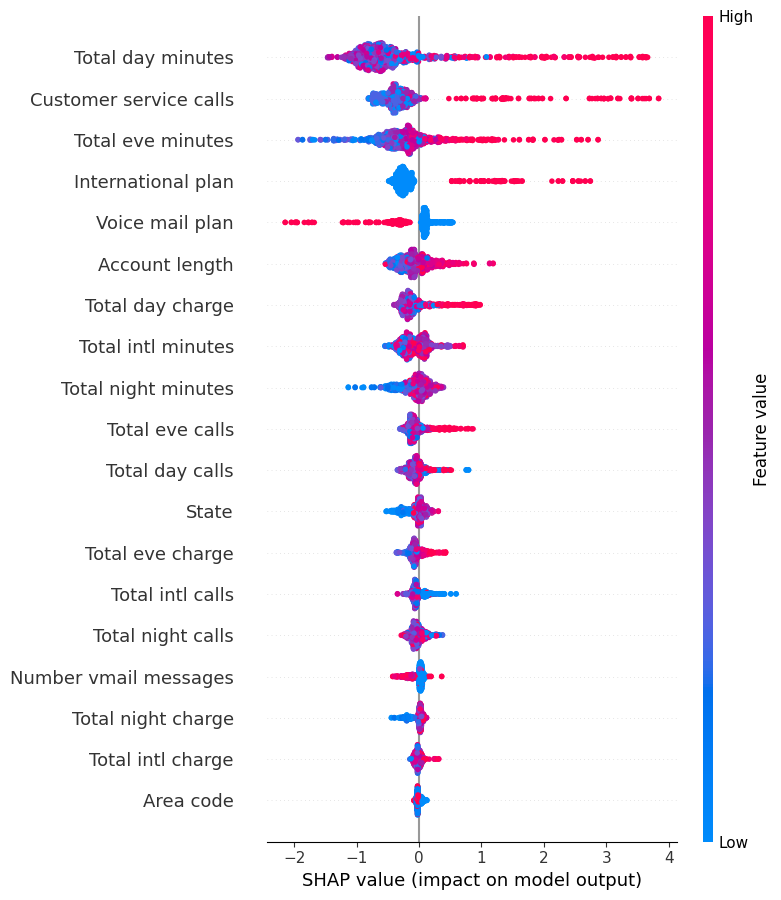

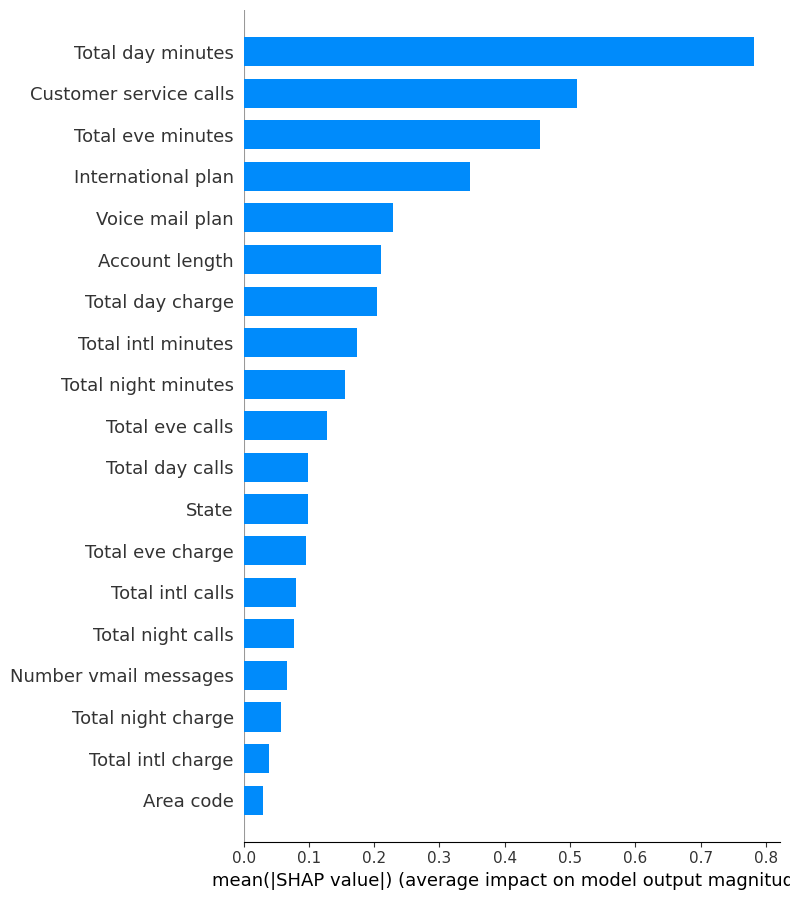

In [76]:
import shap

# Create a TreeExplainer
explainer = shap.TreeExplainer(bst)  # replace with lgbm_model or cat_model as needed
shap_values = explainer.shap_values(X_train)

# Summary plot
shap.summary_plot(shap_values, X_train)

# Feature importance bar plot
shap.summary_plot(shap_values, X_train, plot_type="bar")


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


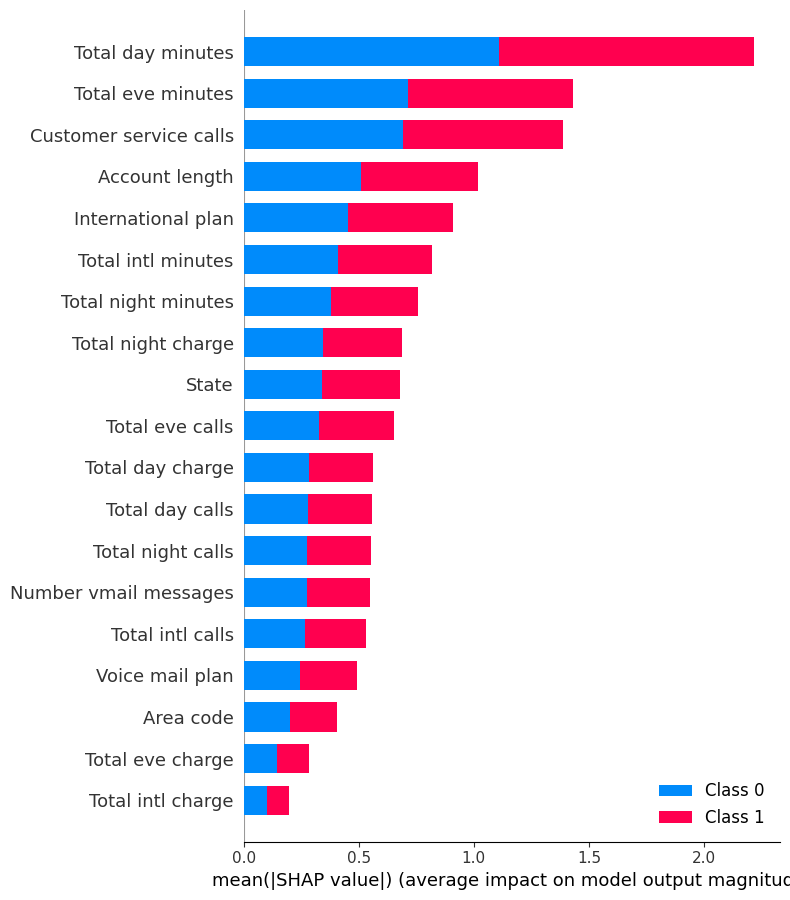

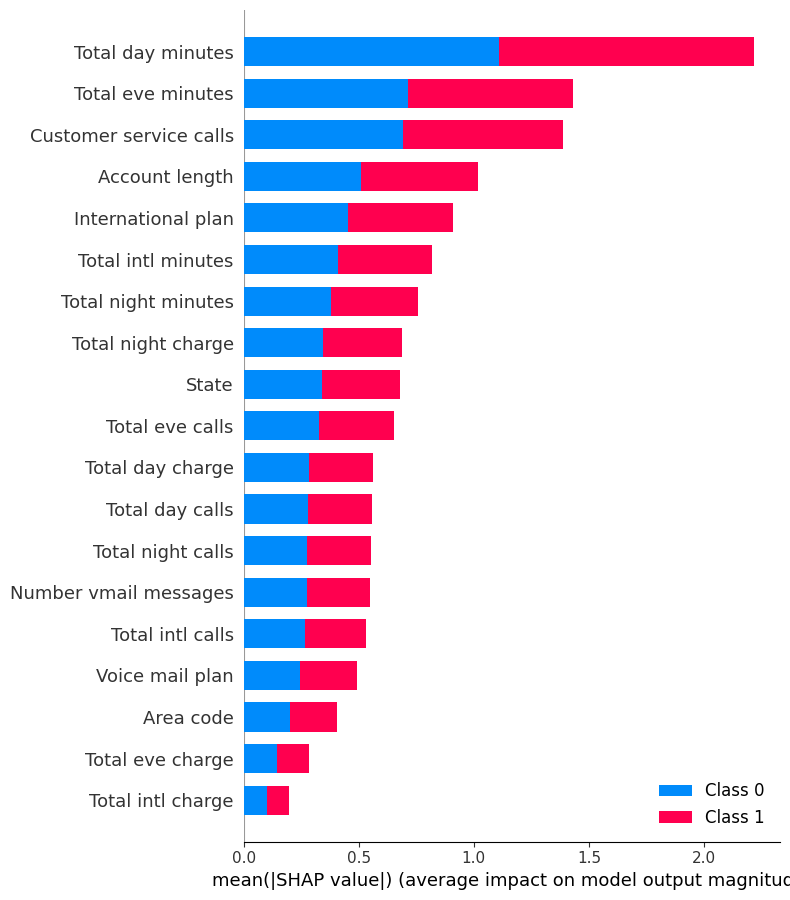

In [77]:
import shap

# Create a TreeExplainer
explainer = shap.TreeExplainer(lgbm_bst)  # replace with lgbm_model or cat_model as needed
shap_values = explainer.shap_values(X_train)

# Summary plot
shap.summary_plot(shap_values, X_train)

# Feature importance bar plot
shap.summary_plot(shap_values, X_train, plot_type="bar")


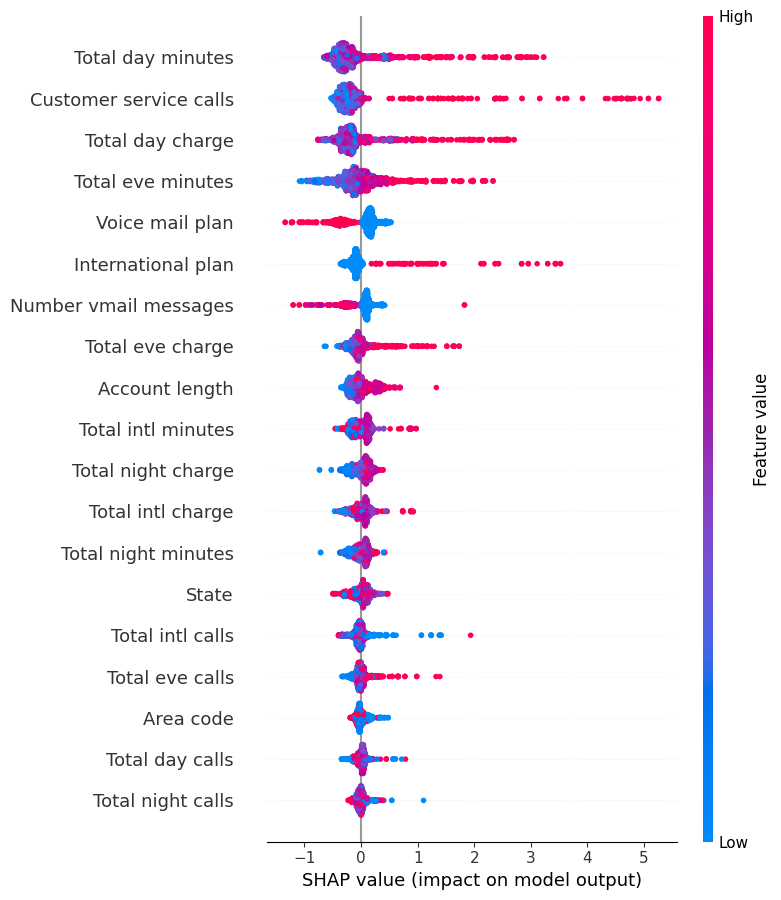

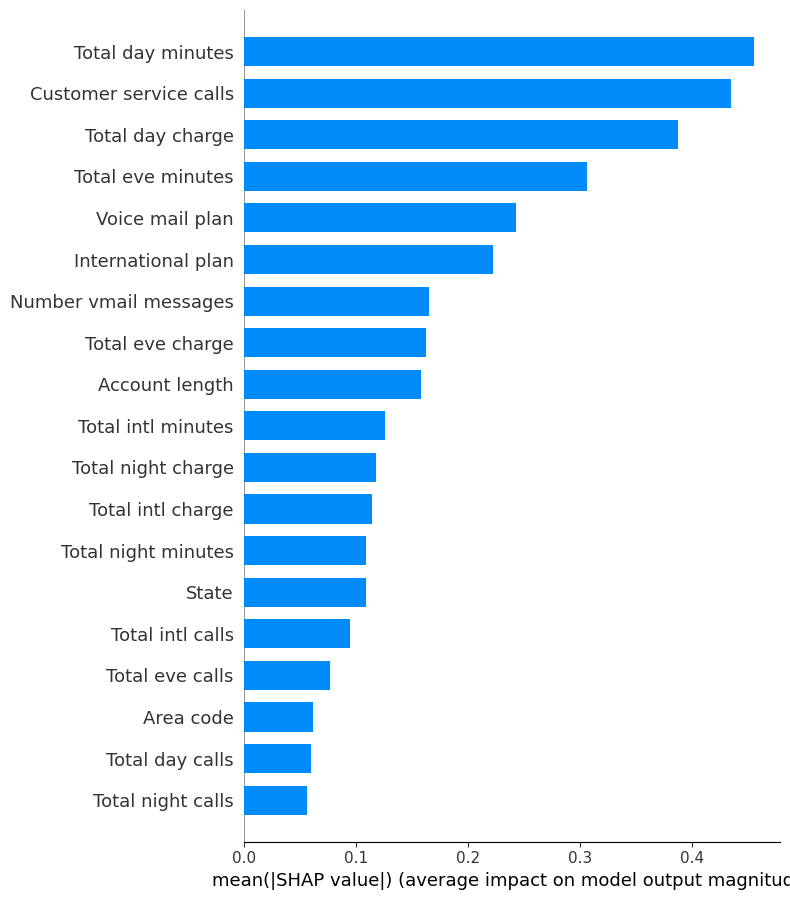

In [78]:
import shap

# Create a TreeExplainer
explainer = shap.TreeExplainer(cat_bst)  # replace with lgbm_model or cat_model as needed
shap_values = explainer.shap_values(X_train)

# Summary plot
shap.summary_plot(shap_values, X_train)

# Feature importance bar plot
shap.summary_plot(shap_values, X_train, plot_type="bar")
